Баданина Наталья ПМ17-1

Тема: Классификация текстов методами машинного обучения.

Данные: https://www.kaggle.com/yutkin/corpus-of-russian-news-articles-from-lenta

**Подключение библиотек**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
import nltk
from pymorphy2 import MorphAnalyzer
#nltk.download('stopwords')
from nltk.corpus import stopwords

from warnings import filterwarnings
filterwarnings('ignore')

**Загрузка датасета**

Данные - корпус новостей с сайта lenta.ru

In [41]:
news = pd.read_csv('lenta-ru-news.csv')

In [62]:
news

,url,title,text,topic,tags,date
0,https://lenta.ru/news/1914/09/16/hungarnn/,1914. Русские войска вступили в пределы Венгрии,Бои у Сопоцкина и Друскеник закончились отступ...,Библиотека,Первая мировая,1914/09/16
1,https://lenta.ru/news/1914/09/16/lermontov/,1914. Празднование столетия М.Ю. Лермонтова от...,"Министерство народного просвещения, в виду про...",Библиотека,Первая мировая,1914/09/16
2,https://lenta.ru/news/1914/09/17/nesteroff/,1914. Das ist Nesteroff!,"Штабс-капитан П. Н. Нестеров на днях, увидев в...",Библиотека,Первая мировая,1914/09/17
3,https://lenta.ru/news/1914/09/17/bulldogn/,1914. Бульдог-гонец под Льежем,Фотограф-корреспондент Daily Mirror рассказыва...,Библиотека,Первая мировая,1914/09/17
4,https://lenta.ru/news/1914/09/18/zver/,1914. Под Люблином пойман швабский зверь,"Лица, приехавшие в Варшаву из Люблина, передаю...",Библиотека,Первая мировая,1914/09/18
...,...,...,...,...,...,...
800970,https://lenta.ru/news/2019/12/14/shnur/,Шнуров раскритиковал Гагарину на «Голосе»,Певец Сергей Шнуров раскритиковал свою коллегу...,NaN,ТВ и радио,2019/12/14
800971,https://lenta.ru/news/2019/12/14/dolg/,В России предложили изменить правила взыскания...,Министерство юстиции России предложило изменит...,NaN,Все,2019/12/14
800972,https://lenta.ru/news/2019/12/14/dark_euro/,В России назвали «черную дату» для Европы,Испытание США ранее запрещенной Договором о ли...,NaN,Политика,2019/12/14
800973,https://lenta.ru/news/2019/12/14/meteo/,Россиянам пообещали аномально теплую погоду,В ближайшие дни в европейской части России пог...,NaN,Общество,2019/12/14


In [64]:
min(news.date), max(news.date)

('1914/09/16', '2019/12/14')

In [66]:
start = 700000
stop = start + 10
news.iloc[start:stop]

,url,title,text,topic,tags,date
700000,https://lenta.ru/news/2018/01/26/ukranianpewds/,Популярный блогер перебрался в украинский инте...,Один из самых высокооплачиваемых YouTube-блоге...,Интернет и СМИ,Coцсети,2018/01/26
700001,https://lenta.ru/news/2018/01/26/samolet/,Российский Су-34 перехватили над Балтикой,"Истребители F-16 ВВС Дании, базирующиеся на ли...",Мир,Общество,2018/01/26
700002,https://lenta.ru/news/2018/01/26/zolotoyorel/,Назван лучший российский фильм года,Лента Клима Шипенко «Салют 7» удостоена премии...,Культура,Кино,2018/01/26
700003,https://lenta.ru/news/2018/01/26/what/,Российскую экономику назвали перспективнее аме...,Министр экономического развития Максим Орешкин...,Экономика,Госэкономика,2018/01/26
700004,https://lenta.ru/news/2018/01/26/perepiska/,В Германии рассказали о перехвате зашифрованны...,Федеральное ведомство по уголовным делам при М...,Интернет и СМИ,Киберпреступность,2018/01/26
700005,https://lenta.ru/news/2018/01/26/stillalive/,«Россия 24» по ошибке похоронила украинского п...,Телеканал «Россия 24» в эфире программы «Вести...,Интернет и СМИ,Пресса,2018/01/26
700006,https://lenta.ru/news/2018/01/26/radar/,В Великобритании нашли способ защитить страны ...,Начальник штаба Королевских военно-воздушных с...,Мир,Политика,2018/01/26
700007,https://lenta.ru/news/2018/01/26/semedo/,Футболист заявился в бордель с пистолетом и по...,Защитник испанского «Вильярреала» Рубен Семеду...,Спорт,Футбол,2018/01/26
700008,https://lenta.ru/news/2018/01/26/reyting/,Определено место Украины в рейтинге свободы че...,Украина заняла 132-е место из 159 и последнее ...,Бывший СССР,Украина,2018/01/26
700009,https://lenta.ru/news/2018/01/26/peregovori/,Стали известны подробности переговоров между С...,Помощник президента России Владислав Сурков и ...,Бывший СССР,Украина,2018/01/26


**Анализ данных**

Целевой переменной для классификации могут выступать ```topic```, ```tags```. Заметим, что значений ```tags``` больше и они конкретнее, чем значения ```topic```. Целевой переменной для первичной модели можно взять ```tags```, исключив ```topic``` из модели. В дальнейшем можно подумать что сделать с исключенной колонкой.

In [200]:
news.tags.unique()

array(['Первая мировая', 'Все', nan, 'Прибалтика', 'Кино', 'Преступность',
       'Общество', 'Происшествия', 'Искусство', 'Бизнес', 'Техника',
       'ТВ и радио', 'Политика', 'Пресса', 'Музыка', 'Люди', 'Звери',
       'Игры', 'Госэкономика', 'Гаджеты', 'Наука', 'Еда', 'Рынки',
       'Деньги', 'Летние виды', 'Интернет', 'Театр', 'Конфликты',
       'Реклама', 'Космос', 'Бокс и ММА', 'Футбол', 'Книги',
       'Зимние виды', 'Достижения', 'Coцсети', 'Вещи', 'События',
       'Средняя Азия', 'Украина', 'Закавказье', 'Белоруссия', 'Молдавия',
       'Софт', 'Квартира', 'Город', 'Дача', 'Офис', 'Оружие', 'Мнения',
       'Москва', 'Регионы', 'Полиция и спецслужбы', 'Криминал',
       'Следствие и суд', 'Движение', 'Производители', 'Мировой бизнес',
       'Финансы компаний', 'Деловой климат', 'Мир', 'Россия', 'Часы',
       'Явления', 'Стиль', 'Инструменты', 'Вооружение', 'Вкусы',
       'Страноведение', 'Госрегулирование', 'История', 'Внешний вид',
       'Автобизнес', 'Аналитика рынка'

In [73]:
news.topic.unique()

array(['Библиотека', 'Россия', 'Мир', 'Экономика', 'Интернет и СМИ',
       'Спорт', 'Культура', 'Из жизни', 'Силовые структуры',
       'Наука и техника', 'Бывший СССР', nan, 'Дом', 'Сочи', 'ЧМ-2014',
       'Путешествия', 'Ценности', 'Легпром', 'Бизнес', 'МедНовости',
       'Оружие', '69-я параллель', 'Культпросвет ', 'Крым'], dtype=object)

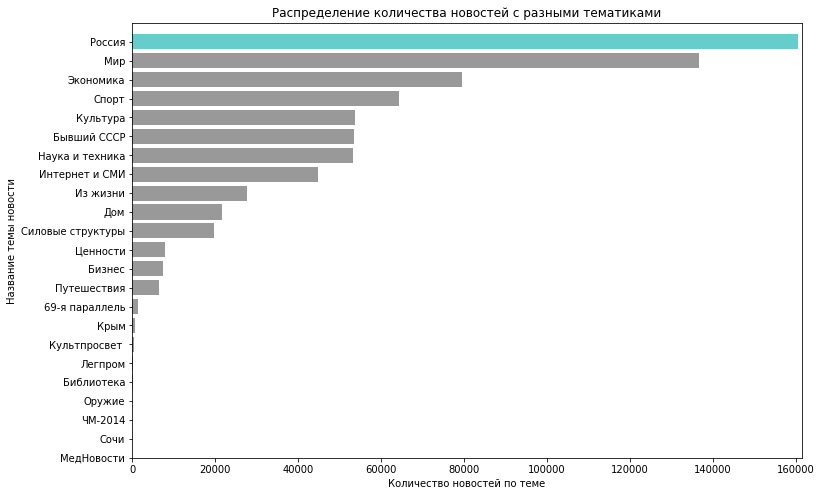

In [100]:
topic_count = news.topic.groupby(news.topic).count().sort_values()

plt.figure(figsize=(12, 8))
colors = ['#999999']*(len(topic_count)-1)+['#66CCCC']
plt.barh(topic_count.index, topic_count, color=colors)
plt.title('Распределение количества новостей с разными тематиками')
plt.xlabel('Количество новостей по теме')
plt.ylabel('Название темы новости')
plt.xlim(0, max(topic_count)+1000)
plt.ylim(0, len(topic_count))
plt.show()

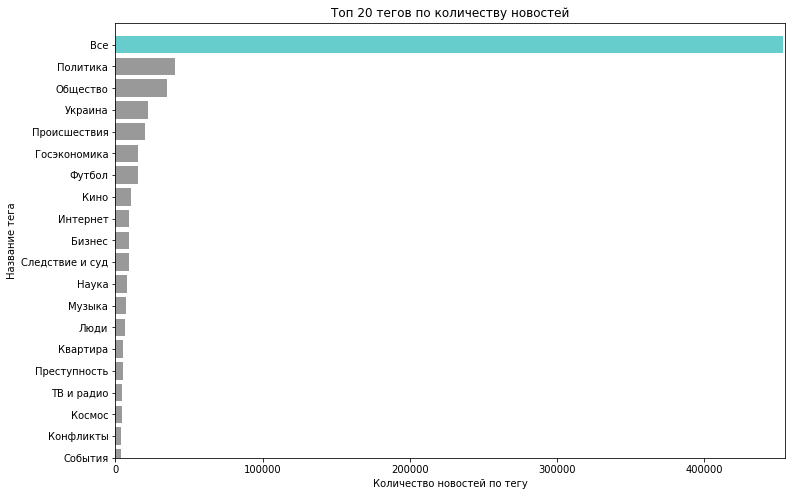

In [113]:
tags_count = news.tags.groupby(news.tags).count().sort_values() #ascending=False
tags_count = tags_count[(len(tags_count)-20):]

plt.figure(figsize=(12, 8))
colors = ['#999999']*(len(tags_count)-1)+['#66CCCC']
plt.barh(tags_count.index, tags_count, color=colors)
plt.title('Топ 20 тегов по количеству новостей')
plt.xlabel('Количество новостей по тегу')
plt.ylabel('Название тега')
plt.xlim(0, max(tags_count)+1000)
plt.ylim(0, len(tags_count))
plt.show()

Из последнего графика видно, что больше всего новостей с тегом ```Все```. Новости с этим тегом нужно исключить из датасета, так как под этим тегом собрана случайная информация, которая будет увеличивать ошибку модели.

In [9]:
news[news.tags=='Все']

,url,title,text,topic,tags,date
5,https://lenta.ru/news/1999/08/31/stancia_mir/,"Космонавты сомневаются в надежности ""Мира""",Как стало известно агентству Ассошиэйтед Пресс...,Россия,Все,1999/08/31
6,https://lenta.ru/news/1999/08/31/vzriv/,Взрыв в центре Москвы: пострадало 30 человек,В зале игровых автоматов в третьем ярусе подзе...,Россия,Все,1999/08/31
7,https://lenta.ru/news/1999/08/31/credit_japs/,Япония кредитует Россию на полтора миллиарда д...,Япония приняла решение разморозить кредиты Рос...,Россия,Все,1999/08/31
8,https://lenta.ru/news/1999/08/31/diana/,Британцы отмечают двухлетие смерти Дианы,Британцы отмечают сегодня скорбную дату - втор...,Мир,Все,1999/08/31
9,https://lenta.ru/news/1999/08/31/mvf/,Отмытые через Bank of NY деньги не имели отнош...,В понедельник директор департамента внешних св...,Россия,Все,1999/08/31
...,...,...,...,...,...,...
800459,https://lenta.ru/news/2019/12/12/podarunok/,Названы самые популярные подарки на Новый год,"Конфеты, шоколад, косметика и парфюмерия стали...",NaN,Все,2019/12/12
800767,https://lenta.ru/news/2019/12/13/contract/,Раскрыты подробности нового контракта России и...,Источник в оборонной промышленности Турции рас...,NaN,Все,2019/12/13
800768,https://lenta.ru/news/2019/12/13/win/,Победители конкурса «Цифровой прорыв» получили...,Победители конкурса «Цифровой прорыв» — флагма...,NaN,Все,2019/12/13
800969,https://lenta.ru/news/2019/12/14/wada/,В WADA подтвердили право России на проведение ...,Всемирное антидопинговое агентство (WADA) подт...,NaN,Все,2019/12/14


Проверим присутствие пропущенных значений в датасете. Пропуски есть в колонках ```topic```, ```tags```. Эти колонки являются целевыми для моделей классификации, поэтому удалим пропущенные значения.

Также удалим колонку ```url``` с информацией о ссылке на новость.

In [10]:
news.isnull().sum()

url          0
title        0
text         5
topic    62002
tags     27219
date         0
dtype: int64

In [89]:
pd.DataFrame(news.isnull().sum(), columns=['Количество пропущенных значений'])

,Количество пропущенных значений
url,0
title,0
text,5
topic,62002
tags,27219
date,0


In [90]:
news = news.drop('url', axis=1)
news = news.drop(news[news.tags.isnull()].index, axis=0)
news = news.drop(news[news.topic.isnull()].index, axis=0)

In [91]:
news = news.drop(news[news.text.isnull()].index, axis=0)

In [10]:
#news = news.drop('date', axis=1)

In [92]:
news = news.drop(news[news.tags=='Все'].index,axis=0)

In [93]:
news = news.reset_index()

In [94]:
news = news.drop('index', axis=1)

In [95]:
news

,title,text,topic,tags,date
0,1914. Русские войска вступили в пределы Венгрии,Бои у Сопоцкина и Друскеник закончились отступ...,Библиотека,Первая мировая,1914/09/16
1,1914. Празднование столетия М.Ю. Лермонтова от...,"Министерство народного просвещения, в виду про...",Библиотека,Первая мировая,1914/09/16
2,1914. Das ist Nesteroff!,"Штабс-капитан П. Н. Нестеров на днях, увидев в...",Библиотека,Первая мировая,1914/09/17
3,1914. Бульдог-гонец под Льежем,Фотограф-корреспондент Daily Mirror рассказыва...,Библиотека,Первая мировая,1914/09/17
4,1914. Под Люблином пойман швабский зверь,"Лица, приехавшие в Варшаву из Люблина, передаю...",Библиотека,Первая мировая,1914/09/18
...,...,...,...,...,...
259068,«Желтые жилеты» прорвали кордон полиции под «М...,Протесты движения «желтых жилетов» в Париже сн...,Мир,Происшествия,2018/12/15
259069,Су-27 разбился на Украине,Истребитель Су-27 разбился в Житомирской облас...,Бывший СССР,Украина,2018/12/15
259070,В Петербурге нашли квартиру из 58 комнат,В Московском районе Санкт-Петербурга на продаж...,Дом,Квартира,2018/12/15
259071,Падение горнолыжника на полной скорости попало...,Швейцарский горнолыжник Марк Гизин неудачно пр...,Спорт,Зимние виды,2018/12/15


In [119]:
year = [news.date[i].split('/')[0] for i in range(len(news))]
news['year'] = year

In [127]:
news = news[news.year == '2018']

In [142]:
news = news.reset_index()

In [144]:
news = news.drop('index', axis=1)

Сохраним полученный датасет.

In [146]:
news.to_csv('news_forAnalyzer.csv', index=False)

**Предварительная обработка данных**

Разобьем заголовок новости и текст на токены; исключим иностранные слова, знаки пунктуации, цифры; исключим многочастотные стоп-слова и лемматизируем оставшиеся.

In [25]:
news = pd.read_csv('news_forAnalyzer.csv')

In [26]:
sw_ru = set(stopwords.words('russian'))

In [61]:
len(sw_ru)

151

In [27]:
#https://countwordsfree.com/stopwords/russian, encoding='CP1251'
with open('stop_words_russian.txt') as f:
    sw_ru = [l for l in f]

In [63]:
len(sw_ru)

421

In [28]:
sw_ru = ''.join(sw_ru).split('\n')

In [29]:
dictionary = {}
pymorphy2_analyzer = MorphAnalyzer()

def get_lemmatized_str(s):
    s = re.findall(r'[а-я-]+', s.lower())
    s = [word for word in s if not word in sw_ru]

    answer = []
    for word in s:
        if word in dictionary.keys():
            answer.append(dictionary[word])
        else:
            norm_word = pymorphy2_analyzer.parse(word)[0].normal_form
            answer.append(norm_word)
            dictionary[word] = norm_word
    
    return set(answer)

Рассмотрим пример работы функции на случайном тексте из датасета.

In [83]:
news[np.where(news.text==min(news.text),news.text,'')!='']

,title,text,topic,tags,date,year
18470,Лидер «Чайфа» перепел песню про 5:0,Фото опубликовано @chaif_band Лидер группы «...,Культура,Музыка,2018/06/14,2018


In [97]:
n = 18470
news.text[n]

'  Фото опубликовано @chaif_band Лидер группы «Чайф» Владимир Шахрин переделал припев своей песни «Аргентина — Ямайка 5:0». Свое творчество он опубликовал на странице музыкального коллектива в Instagram. «Уходит боль, уходит боль. Россия — Саудовская Аравия 5:0», — спел он, после чего назвал отечественную сборную «молодцами, порадовавшими старца». «Аргентина — Ямайка 5:0» — песня российской группы «Чайф» в стиле регги. Она посвящена разгромному поражению сборной Ямайки на чемпионате мира по футболу 1998 года. В 1999 году композиция получила премию «Золотой граммофон» как лучшая рок-песня. 14 июня сборная России обыграла команду Саудовской Аравии в матче-открытии чемпионата мира по футболу 2018 года. Встреча завершилась со счетом 5:0.'

In [98]:
' '.join(get_lemmatized_str(news.text[n]))

'назвать рок-песня песня сборная разгромный ямайка старец аравия лидер поражение золотой хороший встреча опубликовать футбол завершиться счёт июнь граммофон саудовский спеть творчество группа регги страница чайф порадовать шахрина молодец обыграть владимир стиль команда матч-открытие аргентина коллектив премия уходить фото боль российский музыкальный россия отечественный чемпионат переделать получить посвятить композиция припев'

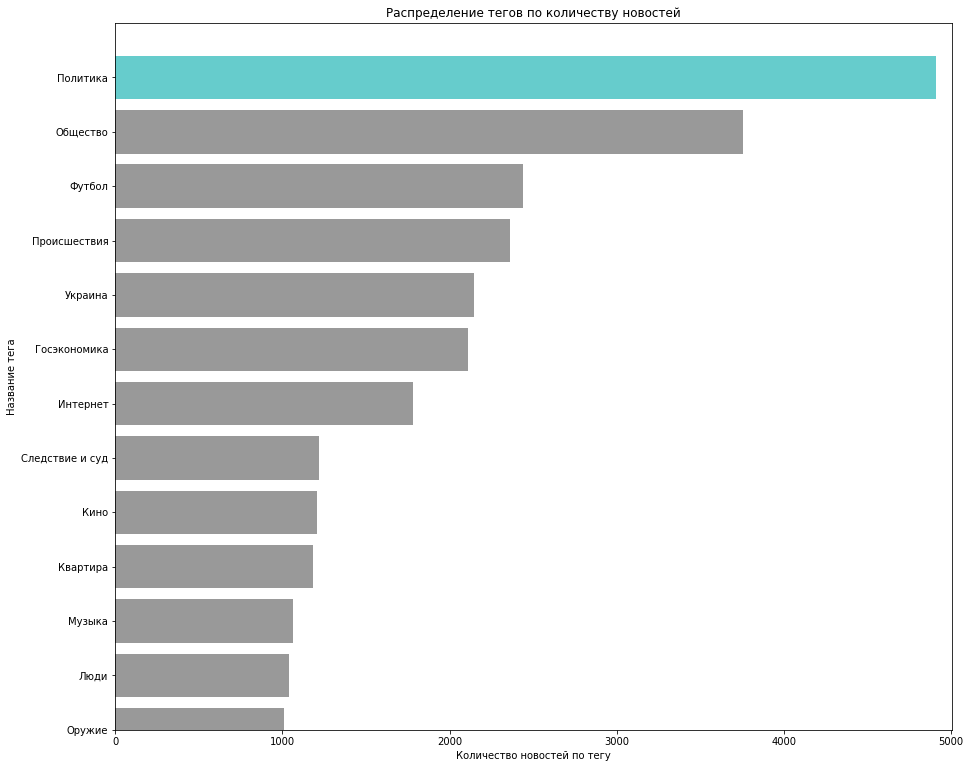

In [37]:
tags_count = news.tags.groupby(news.tags).count().sort_values() #ascending=False
#tags_count = tags_count[(len(tags_count)-20):]
tags_count=tags_count[tags_count>1000]

plt.figure(figsize=(15, 13))
colors = ['#999999']*(len(tags_count)-1)+['#66CCCC']
plt.barh(tags_count.index, tags_count, color=colors)
plt.title('Распределение тегов по количеству новостей')
plt.xlabel('Количество новостей по тегу')
plt.ylabel('Название тега')
plt.xlim(0, max(tags_count)+100)
plt.ylim(0, len(tags_count))
plt.show()

In [31]:
tags_count[tags_count<1000]

tags
Экология           2
Наследие           3
Выборы             3
Туризм             7
Страноведение      8
                ... 
Зимние виды      646
Наука            673
Регионы          677
Бизнес           703
Звери            741
Name: tags, Length: 64, dtype: int64

In [32]:
list(tags_count[tags_count<1000].keys())

['Экология',
 'Наследие',
 'Выборы',
 'Туризм',
 'Страноведение',
 'Фотография',
 'Софт',
 'Игры',
 'Молдавия',
 'Вкусы',
 'Москва',
 'Авто',
 'Мемы',
 'Социальная сфера',
 'Реклама',
 'Вирусные ролики',
 'Вещи',
 'Движение',
 'Еда',
 'Инструменты',
 'Прибалтика',
 'Часы',
 'История',
 'Средняя Азия',
 'Книги',
 'Искусство',
 'Преступная Россия',
 'Мнения',
 'Офис',
 'Театр',
 'Достижения',
 'Киберпреступность',
 'Гаджеты',
 'Белоруссия',
 'Техника',
 'Россия',
 'Город',
 'Деньги',
 'Летние виды',
 'Дача',
 'Мир',
 'Пресса',
 'Жизнь',
 'Хоккей',
 'Закавказье',
 'Внешний вид',
 'Криминал',
 'Coцсети',
 'Полиция и спецслужбы',
 'События',
 'Преступность',
 'Деловой климат',
 'Рынки',
 'Стиль',
 'Явления',
 'ТВ и радио',
 'Космос',
 'Бокс и ММА',
 'Конфликты',
 'Зимние виды',
 'Наука',
 'Регионы',
 'Бизнес',
 'Звери']

In [33]:
news = news[news.tags.isin(list(tags_count[tags_count>1000].keys()))]

In [34]:
news = news.reset_index()

Преобразуем ```title```.

In [35]:
news_ = news.copy()

In [36]:
%%time
for i in range(len(news_.title)):
    news_.title[i] = get_lemmatized_str(news_.title[i])

CPU times: user 22.3 s, sys: 338 ms, total: 22.7 s
Wall time: 22.5 s


In [38]:
news_

,index,title,text,topic,tags,date,year
0,0,"{глаз, -летний, ровесница-немка, беженец, заре...",В немецком городе Кандель (земля Рейнланд-Пфал...,Мир,Общество,2018/01/01,2018
1,1,"{кадыров, прочитать, новогодний, стихотворение}",Глава Чечни Рамзан Кадыров опубликовал в своем...,Россия,Политика,2018/01/01,2018
2,2,"{поддержать, иран, протестовать, белый, дом}",Пресс-секретарь Белого дома Сара Сандерс заяви...,Мир,Политика,2018/01/01,2018
3,3,"{пожар, возможный, причина, южно-сахалинск, ёл...","Пожар, уничтоживший новогоднюю елку на площади...",Россия,Общество,2018/01/01,2018
4,4,"{минимальный, труд, россиянин, размер, оплата,...",В России с 1 января 2018 года минимальный разм...,Экономика,Госэкономика,2018/01/01,2018
...,...,...,...,...,...,...,...
26224,40965,"{раскольник, глава, митрополит, украинский, уп...",Предстоятелем новой украинской православной це...,Бывший СССР,Украина,2018/12/15,2018
26225,40966,"{полиция, кордон, марсельеза, жилет, жёлтый, п...",Протесты движения «желтых жилетов» в Париже сн...,Мир,Происшествия,2018/12/15,2018
26226,40967,"{украина, разбиться, су-}",Истребитель Су-27 разбился в Житомирской облас...,Бывший СССР,Украина,2018/12/15,2018
26227,40968,"{петербург, квартира, комната, наслать}",В Московском районе Санкт-Петербурга на продаж...,Дом,Квартира,2018/12/15,2018


In [39]:
news_ = news_.drop('date', axis=1)
news_ = news_.drop('year', axis=1)
news_ = news_.drop('topic', axis=1)
news_ = news_.drop('index', axis=1)

In [41]:
%%time
for i in range(len(news_.text)):
    news_.text[i] = get_lemmatized_str(news_.text[i])

CPU times: user 59.8 s, sys: 506 ms, total: 1min
Wall time: 1min


In [73]:
news_

,title,text,tags
0,"{глаз, -летний, ровесница-немка, беженец, заре...","{афганец, изнасиловать, произойти, сообщаться,...",Общество
1,"{кадыров, прочитать, новогодний, стихотворение}","{чеченский, напомнить, великий, присвоить, дел...",Политика
2,"{поддержать, иран, протестовать, белый, дом}","{общаться, демонстрант, популярный, решение, ц...",Политика
3,"{пожар, возможный, причина, южно-сахалинск, ёл...","{прибыть, пресс-служба, пожарный, место, южно-...",Общество
4,"{минимальный, труд, россиянин, размер, оплата,...","{закон, минимальный, путин, процент, минтруд, ...",Госэкономика
...,...,...,...
26224,"{раскольник, глава, митрополит, украинский, уп...","{раскольник, пётр, сообщаться, решение, проход...",Украина
26225,"{полиция, кордон, марсельеза, жилет, жёлтый, п...","{столкновение, гарние, мусорный, отставка, эмм...",Происшествия
26226,"{украина, разбиться, су-}","{лётчик, пресс-служба, сша, произойти, погибну...",Украина
26227,"{петербург, квартира, комната, наслать}","{квадратный, место, жизнь, выставить, россия, ...",Квартира


Сохраним полученный результат в отдельном файле.

Преобразуем ```text```.

Сохраним полученный результат в отдельном датасете.

In [74]:
news_.to_csv('news_lemmatized.csv', index=False)

In [2]:
df = pd.read_csv('news_lemmatized.csv')

In [3]:
df

,title,text,tags
0,"{'глаз', '-летний', 'ровесница-немка', 'бежене...","{'афганец', 'изнасиловать', 'произойти', 'сооб...",Общество
1,"{'кадыров', 'прочитать', 'новогодний', 'стихот...","{'чеченский', 'напомнить', 'великий', 'присвои...",Политика
2,"{'поддержать', 'иран', 'протестовать', 'белый'...","{'общаться', 'демонстрант', 'популярный', 'реш...",Политика
3,"{'пожар', 'возможный', 'причина', 'южно-сахали...","{'прибыть', 'пресс-служба', 'пожарный', 'место...",Общество
4,"{'минимальный', 'труд', 'россиянин', 'размер',...","{'закон', 'минимальный', 'путин', 'процент', '...",Госэкономика
...,...,...,...
26224,"{'раскольник', 'глава', 'митрополит', 'украинс...","{'раскольник', 'пётр', 'сообщаться', 'решение'...",Украина
26225,"{'полиция', 'кордон', 'марсельеза', 'жилет', '...","{'столкновение', 'гарние', 'мусорный', 'отстав...",Происшествия
26226,"{'украина', 'разбиться', 'су-'}","{'лётчик', 'пресс-служба', 'сша', 'произойти',...",Украина
26227,"{'петербург', 'квартира', 'комната', 'наслать'}","{'квадратный', 'место', 'жизнь', 'выставить', ...",Квартира


Закодируем ```tags```, чтобы можно было указать колонку в качестве целевой переменной в модели.

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
label_encoder = LabelEncoder()
corpus_encoded = label_encoder.fit_transform(df.tags)

In [5]:
df.tags = corpus_encoded

In [7]:
df

,title,text,tags
0,"{'глаз', '-летний', 'ровесница-немка', 'бежене...","{'афганец', 'изнасиловать', 'произойти', 'сооб...",6
1,"{'кадыров', 'прочитать', 'новогодний', 'стихот...","{'чеченский', 'напомнить', 'великий', 'присвои...",8
2,"{'поддержать', 'иран', 'протестовать', 'белый'...","{'общаться', 'демонстрант', 'популярный', 'реш...",8
3,"{'пожар', 'возможный', 'причина', 'южно-сахали...","{'прибыть', 'пресс-служба', 'пожарный', 'место...",6
4,"{'минимальный', 'труд', 'россиянин', 'размер',...","{'закон', 'минимальный', 'путин', 'процент', '...",0
...,...,...,...
26224,"{'раскольник', 'глава', 'митрополит', 'украинс...","{'раскольник', 'пётр', 'сообщаться', 'решение'...",11
26225,"{'полиция', 'кордон', 'марсельеза', 'жилет', '...","{'столкновение', 'гарние', 'мусорный', 'отстав...",9
26226,"{'украина', 'разбиться', 'су-'}","{'лётчик', 'пресс-служба', 'сша', 'произойти',...",11
26227,"{'петербург', 'квартира', 'комната', 'наслать'}","{'квадратный', 'место', 'жизнь', 'выставить', ...",2


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
answer = []
def get_title_corpus(title):
    answer.append(' '.join(re.findall(r'[а-я-]+', title)))

In [8]:
for title in df.title:
    get_title_corpus(title)

In [9]:
%%time
tfidf = TfidfVectorizer()
title_tfidf = tfidf.fit_transform(answer)

CPU times: user 296 ms, sys: 14.1 ms, total: 310 ms
Wall time: 310 ms


In [10]:
feature_names = tfidf.get_feature_names()
corpus_index = [n for n in answer]

In [11]:
df_tfidf = pd.DataFrame(title_tfidf.todense(), index=corpus_index, columns=feature_names)
df_tfidf

,абашидзе,аббас,абдулатипов,абитуриент,абонемент,абордаж,аборт,абрамович,абрамс,абсолютно,...,ярый,ясность,ястреб,яхта,яхтсмен,яценюк,ячейка,яшин,ящерица,ящик
глаз -летний ровесница-немка беженец зарезать,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
кадыров прочитать новогодний стихотворение,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
поддержать иран протестовать белый дом,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
пожар возможный причина южно-сахалинск лка назвать уничтожить,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
минимальный труд россиянин размер оплата увеличиться,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
раскольник глава митрополит украинский упц захотеть сделать мятежный,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
полиция кордон марсельеза жилет ж лтый прорвать,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
украина разбиться су-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
петербург квартира комната наслать,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Разделим датасет на тестовую и обучающую выборки.

In [12]:
x = df_tfidf
y = df.tags

In [13]:
x.index = df.index

In [16]:
x.head()

,абашидзе,аббас,абдулатипов,абитуриент,абонемент,абордаж,аборт,абрамович,абрамс,абсолютно,...,ярый,ясность,ястреб,яхта,яхтсмен,яценюк,ячейка,яшин,ящерица,ящик
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [82]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [83]:
%%time
dtc.fit(x_train, y_train)

CPU times: user 8min 23s, sys: 1.62 s, total: 8min 24s
Wall time: 8min 25s


DecisionTreeClassifier()

In [84]:
dtc.score(x_test, y_test)

0.5747458410351202

In [59]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

In [60]:
%%time
log_reg.fit(x_train, y_train)

CPU times: user 2min 56s, sys: 1.4 s, total: 2min 58s
Wall time: 45.7 s


LogisticRegression()

In [61]:
log_reg.score(x_test, y_test)

0.6879621072088724

In [62]:
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier()

In [63]:
%%time
sgdc.fit(x_train, y_train)

CPU times: user 1min 6s, sys: 579 ms, total: 1min 7s
Wall time: 1min 1s


SGDClassifier()

In [64]:
sgdc.score(x_test, y_test)

0.708641404805915

In [66]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [67]:
%%time
rfc.fit(x_train, y_train)

CPU times: user 8min 13s, sys: 1.79 s, total: 8min 15s
Wall time: 8min 16s


RandomForestClassifier()

In [68]:
rfc.score(x_test, y_test)

0.6548059149722736

In [85]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [86]:
%%time
nb.fit(x_train, y_train)

CPU times: user 1.11 s, sys: 6.7 ms, total: 1.11 s
Wall time: 575 ms


MultinomialNB()

In [87]:
nb.score(x_test, y_test)

0.5481746765249538

In [88]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier()

In [89]:
%%time
pac.fit(x_train, y_train)

CPU times: user 2min 53s, sys: 524 ms, total: 2min 53s
Wall time: 2min 46s


PassiveAggressiveClassifier()

In [90]:
pac.score(x_test, y_test)

0.6652033271719039

In [16]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC()

In [93]:
%%time
lsvc.fit(x_train, y_train)

CPU times: user 1.57 s, sys: 10.4 ms, total: 1.58 s
Wall time: 1.59 s


LinearSVC()

In [94]:
lsvc.score(x_test, y_test)

0.7115295748613678

In [17]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(base_estimator=LinearSVC(), n_estimators=10, n_jobs=-1)

In [18]:
%%time
bc.fit(x_train, y_train)

CPU times: user 1.82 s, sys: 5.88 s, total: 7.7 s
Wall time: 3min 52s


BaggingClassifier(base_estimator=LinearSVC(), n_jobs=-1)

In [20]:
bc.score(x_test, y_test)

0.7128003696857671

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

lsvc = LinearSVC()

# Gridsearch to determine the value of C
param_grid = {'SVC__C':np.arange(0.01,100,10)}
linearSVC = GridSearchCV(SVCpipe,param_grid,cv=5,return_train_score=True)
linearSVC.fit(X_train,y_train)
print(linearSVC.best_params_)
#linearSVC.coef_
#linearSVC.intercept_

bestlinearSVC = linearSVC.best_estimator_
bestlinearSVC.fit(X_train,y_train)
bestlinearSVC.coef_ = bestlinearSVC.named_steps['SVC'].coef_
bestlinearSVC.score(X_train,y_train)

In [54]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

lsvc = LinearSVC()

param_grid = {'C': np.arange(0.01,1,0.1), 'loss': ['hinge', 'squared_hinge'], 'max_iter': [1000, 2000]}
linearSVC = GridSearchCV(lsvc, param_grid, scoring='accuracy')

In [55]:
%%time
linearSVC.fit(x_train, y_train)

CPU times: user 10min 12s, sys: 3min 11s, total: 13min 24s
Wall time: 11min 15s


GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91]),
                         'loss': ['hinge', 'squared_hinge'],
                         'max_iter': [1000, 2000]},
             scoring='accuracy')

In [65]:
bestlinearSVC = linearSVC.best_params_
bestlinearSVC

{'C': 0.51, 'loss': 'squared_hinge', 'max_iter': 1000}

In [67]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(C=0.51, loss='squared_hinge', max_iter=1000)

In [68]:
lsvc.fit(x_train,y_train)

LinearSVC(C=0.51)

In [69]:
lsvc.score(x_test, y_test)

0.717652495378928

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, log_loss

In [79]:
y_pred = lsvc.predict(x_test)
print("Precision: {0:6.2f}".format(precision_score(y_test, y_pred, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(y_test, y_pred, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(y_test, y_pred, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Precision:   0.74
Recall:   0.71
F1-measure:   0.72
Accuracy:   0.72
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       662
           1       0.74      0.65      0.69       622
           2       0.93      0.85      0.89       375
           3       0.84      0.82      0.83       392
           4       0.55      0.41      0.47       368
           5       0.85      0.75      0.80       360
           6       0.52      0.54      0.53      1278
           7       0.79      0.66      0.72       325
           8       0.72      0.82      0.77      1602
           9       0.58      0.59      0.58       789
          10       0.64      0.56      0.60       383
          11       0.81      0.89      0.85       714
          12       0.92      0.94      0.93       786

    accuracy                           0.72      8656
   macro avg       0.74      0.71      0.72      8656
weighted avg       0.72      0.72      0.72      8656



In [95]:
label_encoder.inverse_transform([2, 3, 5, 11, 12])

array(['Квартира', 'Кино', 'Музыка', 'Украина', 'Футбол'], dtype=object)

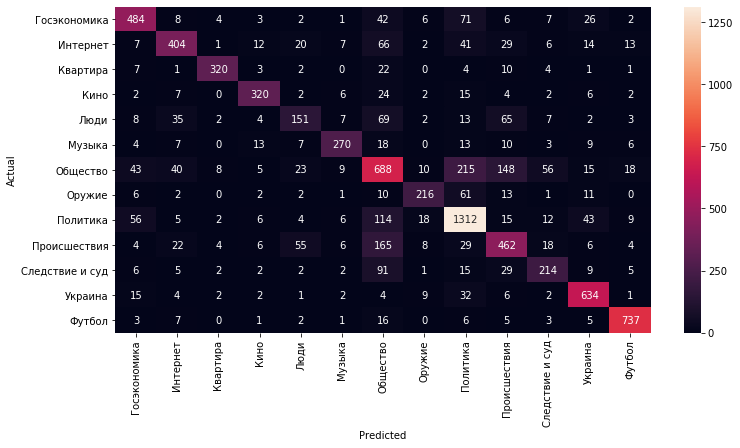

In [89]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(12, 6))

conf_mat = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=label_encoder.inverse_transform(range(13)),
            yticklabels=label_encoder.inverse_transform(range(13)))
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [96]:
df[df.tags==6]

,title,text,tags
0,"{'глаз', '-летний', 'ровесница-немка', 'бежене...","{'афганец', 'изнасиловать', 'произойти', 'сооб...",6
3,"{'пожар', 'возможный', 'причина', 'южно-сахали...","{'прибыть', 'пресс-служба', 'пожарный', 'место...",6
6,"{'алкогольный', 'россия', 'запретить', 'энерге...","{'алкогольный', 'способ', 'этиловый', 'закон',...",6
7,"{'первый', 'мчс', 'часы', 'наступить', 'отчита...","{'напомнить', 'повышенный', 'зафиксировать', '...",6
8,"{'полиция', 'ночь', 'берлин', 'случай', 'сексу...","{'бросать', 'место', 'закон', 'поступок', 'име...",6
...,...,...,...
26181,"{'российский', 'обрушиться', 'школьник', 'виде...","{'послать', 'произойти', 'сообщаться', 'попаст...",6
26201,"{'соседский', 'наказать', 'сбросить', 'россиян...","{'сосед', 'обойтись', 'расцениваться', 'свобод...",6
26205,"{'солсбери', 'одеревенеть', 'описать', 'скрипа...","{'лежать', 'пожарный', 'место', 'химзащита', '...",6
26206,"{'план', 'рассказать', 'заминировать', 'севаст...","{'полуостров', 'инструкция', 'россия', 'получа...",6


In [98]:
df[df.tags==7]

,title,text,tags
22,"{'индия', 'закупить', 'российский', 'бомба', '...","{'называться', 'бомба', 'сообщаться', 'россия'...",7
50,"{'показать', 'новый', 'вдв', 'бронеавтомобиль'...","{'сообщаться', 'россия', 'проходить', 'подход'...",7
67,"{'гром-', 'новый', 'комплекс', 'украинский', '...","{'база', 'промышленный', 'провести', '-страниц...",7
102,"{'самолёт', 'российский', 'получить', 'военный...","{'фронтовой', 'двухместный', 'постсоветский', ...",7
112,"{'воздух', 'новый', 'срок', 'бомбардировщик', ...","{'источник', 'воздух', 'ракетоносец', 'отличие...",7
...,...,...,...
26106,"{'российский', 'музейный', 'экспонат', 'ту-', ...","{'обратно', 'прибыть', 'ракетоносец', 'сша', '...",7
26109,"{'сша', 'российский', 'провал', 'панцирь', 'об...","{'специалист', 'малый', 'панцирь', 'отечество'...",7
26116,"{'ядерный', 'российский', 'украина', 'неудача'...","{'измерение', 'специалист', 'россия', 'иметь',...",7
26162,"{'российский', 'деньга', 'двигатель', 'россия'...","{'практически', 'малый', 'двигателестроительны...",7
